In [2]:
import wandb
import pandas as pd
from matplotlib import pyplot as plt

import ast
import json

from src.data.utils import download_wandb_table
from src.visualization.visualize import latexify

In [3]:
ENTITY = "bdata"
PROJECT = "ts_and_lang"
RUN_ID = "hgk8j4hm"
TABLE_NAME = "test_results"

In [4]:
def extract_dictionary_from_string(string):
    dictionary_string = string[string.find("{"):string.find("}")+1]
    dictionary = ast.literal_eval(dictionary_string)
    return dictionary


In [5]:
df = download_wandb_table(entity = ENTITY, project = PROJECT, run_id = RUN_ID, 
                          table_name=TABLE_NAME)

12/26/2023 10:45:55 - ERROR - wandb.jupyter -   Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb:   1 of 1 files downloaded.  
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


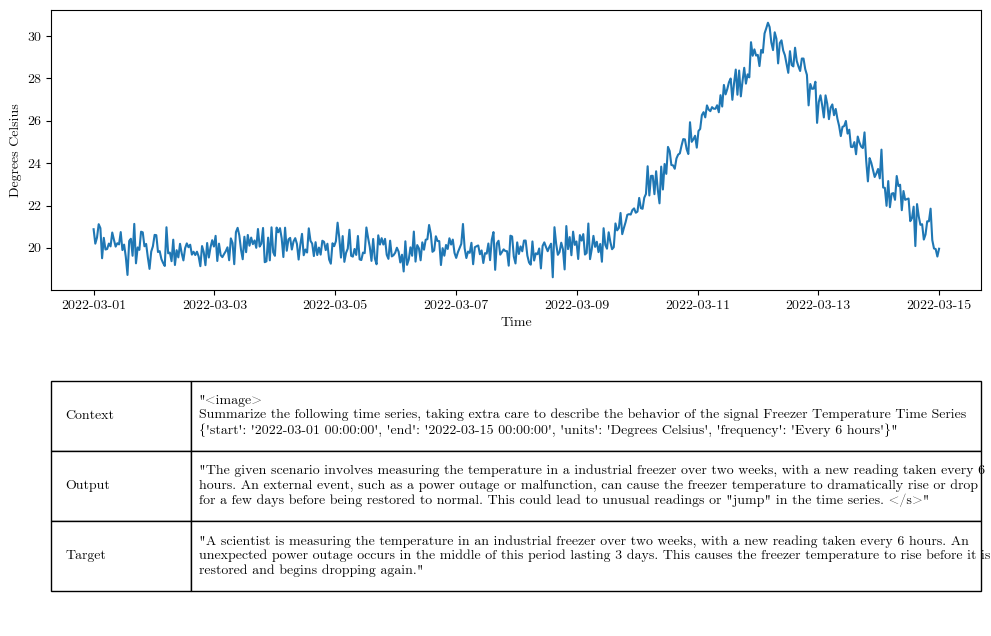

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import inset_locator
from src.visualization.visualize import paper_mpl_env

with paper_mpl_env():
    IDX = 0
    item = df.iloc[IDX]
    # Create a figure and main axes
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 8))

    # Create some sample data and plot it
    metadata =  extract_dictionary_from_string(item["context"])
    start = metadata["start"]
    end = metadata["end"]
    x = pd.date_range(start=start, end=end, periods=len(item["ts"]))
    ax1.plot(x, item["ts"])
    ax1.set_xlabel("Time")
    ax1.set_ylabel(metadata["units"])

    
    col_labels = ['Context','Output', 'Target']
    table_vals = [item["context"], item["result"], item["label"]]
    table_vals = [f"\"{item.strip()}\"" for item in table_vals]
    # wrap the text
    # table_vals = ["\n".join(textwrap.wrap(row,width=CHARS_PER_LINE)) for row in table_vals]

    axins = ax2
    table_data = list(zip(col_labels, table_vals))
    table = axins.table(cellText=table_data, loc='center',cellLoc='left')

    # Style the table


    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.)  # Adjust the scaling factor as needed
    # table.AXESPAD = 0.1

    for i, key in enumerate(table.get_celld().keys()):
        cell = table[key]
        if i % 2 == 0:
            cell.set_width(0.15)
            
        else:
            cell.set_width(0.85)
            cell.PAD = 0.01

        if i > 3:
            cell.set_height(0.25)  # Adjust cell height for wrapping
        elif i > 1:
            cell.set_height(0.25)
        else:
            cell.set_height(0.25)

        cell.set_text_props(multialignment='left', va = "center", wrap=True,)  # Center-align text

        # if i == 5:
        #     cell.set_fontsize(9)

        

    # Remove the axes ticks and labels for the inset axes
    axins.axis('off')

# plt.savefig("reports/2024/open_ended_results.pdf", bbox_inches='tight')
plt.show()

In [14]:
print(df.iloc[IDX]["context"])

<image>
Summarize the following time series, taking extra care to describe the behavior of the signalMeteor shower sales {'start': '2023-06-01', 'end': '2023-06-30', 'units': 'number of telescopes', 'frequency': 'daily'}
